In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model

In [49]:

insurance_dataset = pd.read_csv("insurance.csv")
print(insurance_dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [50]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
#EDA
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


c:\users\sathv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


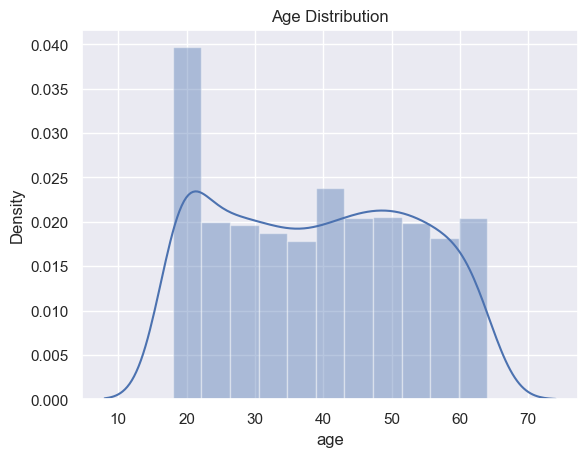

In [52]:
#hence we have found categorical featrures of our dataset which are sex, smoker, region
#insurance_dataset.sum()

sns.set()
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

In [53]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

c:\users\sathv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


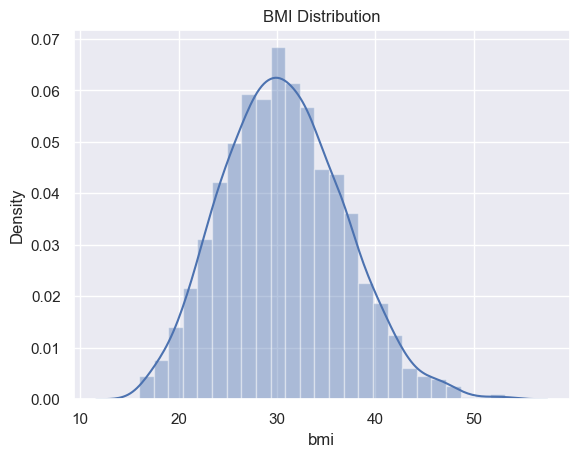

In [54]:
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

c:\users\sathv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


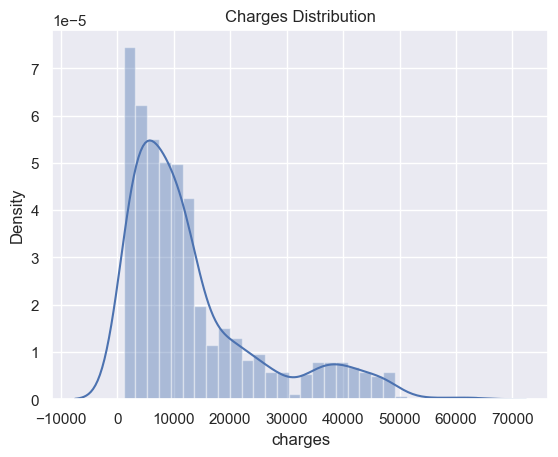

In [55]:
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [56]:
insurance_dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [57]:
#ignore LE, we can use a better method
le = LabelEncoder()
le.fit(insurance_dataset['sex'])
list(le.classes_)
le.transform(insurance_dataset['sex'])

array([0, 1, 1, ..., 0, 0, 0])

In [58]:
insurance_dataset['Encoded_sex'] = insurance_dataset.sex.factorize()[0]
insurance_dataset['Encoded_smoker'] = insurance_dataset.smoker.factorize()[0]
insurance_dataset['Encoded_region'] = insurance_dataset.region.factorize()[0]

In [59]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges,Encoded_sex,Encoded_smoker,Encoded_region
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [60]:
insurance_dataset.drop(columns='sex', axis=1, inplace = True)
insurance_dataset.drop(columns='region', axis=1, inplace = True)
insurance_dataset.drop(columns='smoker', axis=1, inplace = True)

In [61]:
X = insurance_dataset.drop(columns='charges', axis=1)

In [62]:
Y = insurance_dataset['charges']

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [65]:
#WE CAN USE DIFFERENT MODELS
#linear REGRESSION

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#predicting on training data
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared values for training : ', r2_train)


#predicting on testing data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared values for testing : ', r2_test)

R squared values for training :  0.7475615631933097
R squared values for testing :  0.7623224022563388


In [66]:
input_data = (24,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[4916.43897666]
The insurance cost is USD  4916.438976661881


c:\users\sathv\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [67]:
#WITHOUT train-test split!!! ( NOT A GOOD METHOD TO PERFORM ML MODELLING)

reg = linear_model.LinearRegression()
reg.fit(insurance_dataset[['age','Encoded_sex','bmi','children','Encoded_smoker','Encoded_region']],insurance_dataset.charges)
reg.predict([[24,1,25.74,0,1,0]])

c:\users\sathv\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1727.78604998])

In [68]:
#TRY USING FEATURE SCALLING AND CHECK THE RESULTS!!!

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
insurance_dataset['bmi'] = scaler.fit_transform(insurance_dataset[['bmi']])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#predicting on training data
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared values for training : ', r2_train)


#predicting on testing data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared values for testing : ', r2_test)


R squared values for training :  0.7475615631933097
R squared values for testing :  0.7623224022563388


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
insurance_dataset['bmi'] = scaler.fit_transform(insurance_dataset[['bmi']])
insurance_dataset['age'] = scaler.fit_transform(insurance_dataset[['age']])
insurance_dataset['children'] = scaler.fit_transform(insurance_dataset[['children']])
insurance_dataset['Encoded_sex'] = scaler.fit_transform(insurance_dataset[['Encoded_sex']])
insurance_dataset['Encoded_region'] = scaler.fit_transform(insurance_dataset[['Encoded_region']])
insurance_dataset['Encoded_smoker'] = scaler.fit_transform(insurance_dataset[['Encoded_smoker']])

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

print(X)

           age       bmi  children  Encoded_sex  Encoded_smoker  \
0    -1.438764 -0.453320 -0.908614    -1.010519       -1.970587   
1    -1.509965  0.509621 -0.078767     0.989591        0.507463   
2    -0.797954  0.383307  1.580926     0.989591        0.507463   
3    -0.441948 -1.305531 -0.908614     0.989591        0.507463   
4    -0.513149 -0.292556 -0.908614     0.989591        0.507463   
...        ...       ...       ...          ...             ...   
1333  0.768473  0.050297  1.580926     0.989591        0.507463   
1334 -1.509965  0.206139 -0.908614    -1.010519        0.507463   
1335 -1.509965  1.014878 -0.908614    -1.010519        0.507463   
1336 -1.296362 -0.797813 -0.908614    -1.010519        0.507463   
1337  1.551686 -0.261388 -0.908614    -1.010519       -1.970587   

      Encoded_region  
0          -1.343905  
1          -0.438495  
2          -0.438495  
3           0.466915  
4           0.466915  
...              ...  
1333        0.466915  
1334       

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


#predicting on training data
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared values for training : ', r2_train)


#predicting on testing data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared values for testing : ', r2_test)


R squared values for training :  0.7475615631933097
R squared values for testing :  0.7623224022563388
